In [9]:
import pandas as pd 
import understatapi
import time
from datetime import datetime

client = understatapi.UnderstatClient()


In [17]:
leaguedata = client.league(league='Serie_A').get_match_data(season='2024')
game_date = datetime.strptime(leaguedata[0]['datetime'], '%Y-%m-%d %H:%M:%S')
today = datetime.today()
print(today)
print(game_date)
if game_date < today:
    print('Passed')


2024-10-12 12:15:19.933589
2024-08-17 16:30:00
Passed


In [13]:
ShotData = client.match(match='27362').get_shot_data()
ShotData['h'][2]

{'id': '584924',
 'minute': '19',
 'result': 'Goal',
 'X': '0.9640000152587891',
 'Y': '0.49900001525878906',
 'xG': '0.7673426270484924',
 'player': 'Alessandro Vogliacco',
 'h_a': 'h',
 'player_id': '12124',
 'situation': 'SetPiece',
 'season': '2024',
 'shotType': 'RightFoot',
 'match_id': '27362',
 'h_team': 'Genoa',
 'a_team': 'Inter',
 'h_goals': '2',
 'a_goals': '2',
 'date': '2024-08-17 16:30:00',
 'player_assisted': None,
 'lastAction': 'Rebound'}

In [19]:
epl_matches = client.league(league='EPL').get_match_data(season='2024')

#TODO: need to assign the team the player plays for vs who it was against, look at the home and away. Need to only pull back games that have been played then the 2 can be intergrated

match_dataframes =[]

match_id_list = []
for match in epl_matches:
    game_date = datetime.strptime(match['datetime'], '%Y-%m-%d %H:%M:%S')
    today = datetime.today()
    if game_date < today:
        match_id_list.append(match['id'])

        home_team = match['h']['title']
        away_team = match['a']['title']


for id in match_id_list:
    match_data = client.match(id).get_shot_data()
    df_home = pd.DataFrame(match_data['h'])
    df_away = pd.DataFrame(match_data['a'])
    df_match = pd.concat([df_home, df_away], ignore_index=True)

    # Concatenate the home and away data for this match
    df_match = pd.concat([df_home, df_away], ignore_index=True)

    # Collect each match's DataFrame into the list
    match_dataframes.append(df_match)
        
        

df_all_matches = pd.concat(match_dataframes, ignore_index=True)
df_all_matches.head 

<bound method NDFrame.head of           id minute       result                   X                    Y  \
0     584630     19  MissedShots   0.970999984741211   0.6730000305175782   
1     584631     26  MissedShots  0.7469999694824219  0.47900001525878905   
2     584632     28    SavedShot  0.9130000305175782  0.34599998474121096   
3     584633     33    SavedShot  0.9130000305175782  0.46299999237060546   
4     584634     36  MissedShots  0.9580000305175781   0.5990000152587891   
...      ...    ...          ...                 ...                  ...   
1870  596309     52  MissedShots   0.914000015258789   0.5359999847412109   
1871  596315     71  MissedShots  0.7630000305175781   0.6809999847412109   
1872  596316     77  BlockedShot  0.7440000152587891   0.5279999923706055   
1873  596317     78  MissedShots  0.8369999694824218    0.610999984741211   
1874  596318     82    SavedShot   0.840999984741211   0.5120000076293946   

                        xG                  p

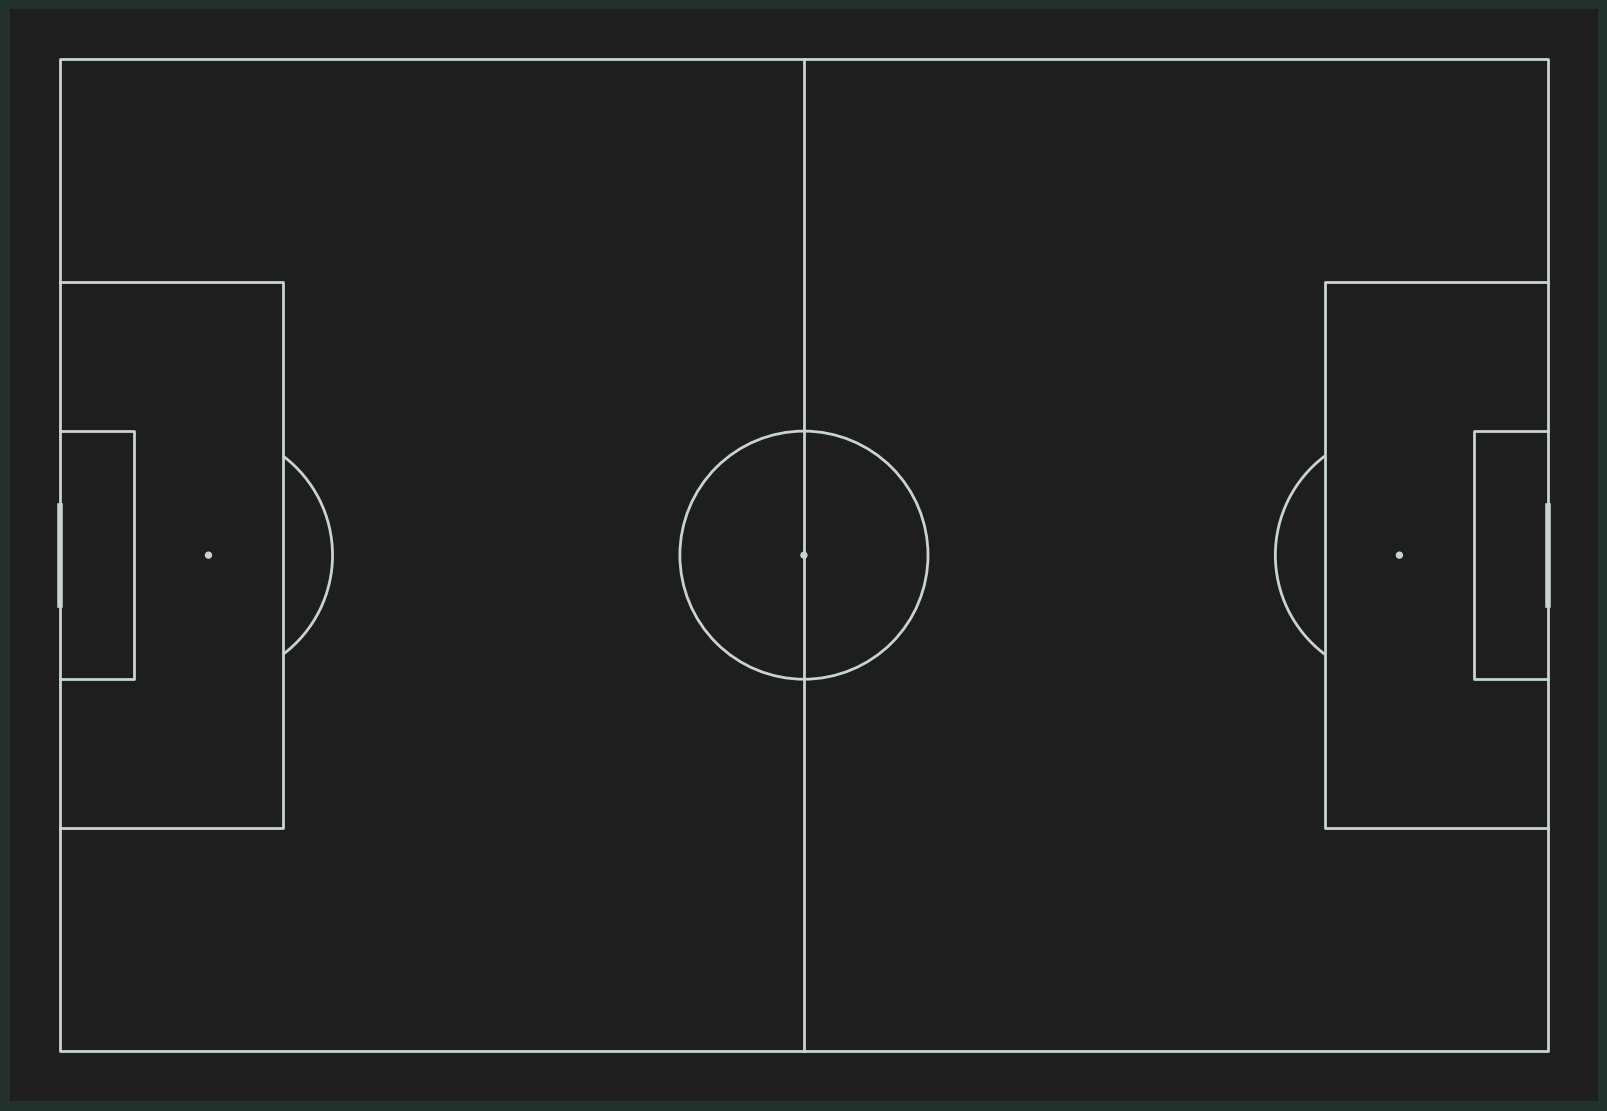

In [25]:
from mplsoccer import Pitch

pitch = Pitch(pitch_type='statsbomb', pitch_color='#1e1e1e', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')